1. Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy (параметр values у датафрейма). В первой колонке файла с данными записано, была или нет реакция. Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы, такие как размер, форма и т.д. Разбейте выборку на обучающую и тестовую, используя функцию train_test_split с параметрами test_size = 0.8 и random_state = 241.
1. Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241 и для каждого значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:
1. Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке на каждой итерации.
1. Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле 1 / (1 + e^{−y_pred}), где y_pred — предсказанное значение.
1. Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции sklearn.metrics.log_loss) на обучающей и тестовой выборках, а также найдите минимальное значение метрики и номер итерации, на которой оно достигается.
3. Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации: переобучение (overfitting) или недообучение (underfitting)? В ответе укажите одно из слов overfitting либо underfitting.

4. Приведите минимальное значение log-loss на тестовой выборке и номер итерации, на котором оно достигается, при learning_rate = 0.2.

5. На этих же данных обучите RandomForestClassifier с количеством деревьев, равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта, c random_state=241 и остальными параметрами по умолчанию. Какое значение log-loss на тесте получается у этого случайного леса? (Не забывайте, что предсказания нужно получать с помощью функции predict_proba. В данном случае брать сигмоиду от оценки вероятности класса не нужно)

In [110]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
%matplotlib inline

pylab.rcParams['figure.figsize'] = 12.0, 7.0

plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.family'] = 'serif'

plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 12
# sns.set_context("notebook", font_scale=1.3)

https://www.kaggle.com/c/bioresponse

In [86]:
import pandas as pd
import sklearn
import numpy as np

In [87]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from scipy.special import expit
from sklearn.metrics import log_loss

In [88]:
data = pd.read_csv('data/gbm-data.csv')

y = data['Activity'].values
del data['Activity']
X = data.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((750, 1776), (750,), (3001, 1776), (3001,))

In [89]:
learning_rates = [1, 0.5, 0.3, 0.2, 0.1]

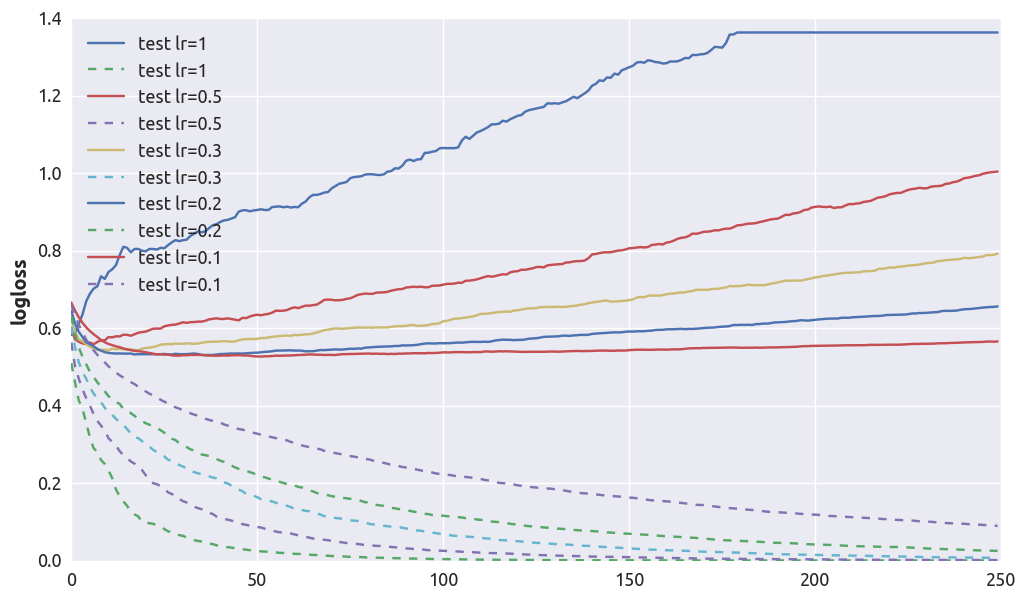

In [113]:
for learning_rate in learning_rates:
    cls = GradientBoostingClassifier(n_estimators=250, verbose=False, random_state=241, learning_rate=learning_rate)
    cls.fit(X_train, y_train)
    
    ll_staged_test = [log_loss(y_test, expit(z)) for z in cls.staged_decision_function(X_test)]
    ll_staged_train = [log_loss(y_train, expit(z)) for z in cls.staged_decision_function(X_train)]
    
    plt.plot(range(len(ll_staged_test)), ll_staged_test, linestyle='-', label='test lr={}'.format(learning_rate))
    plt.plot(range(len(ll_staged_train)), ll_staged_train, linestyle='--', label='test lr={}'.format(learning_rate))

plt.legend(loc='best')
plt.ylabel('logloss');

# 0

In [ ]:
learning_rate = .2

In [90]:
cls = GradientBoostingClassifier(n_estimators=250, verbose=False, random_state=241, learning_rate=learning_rate)
cls.verbose = False
cls.fit(X_train, y_train)
predictions = cls.predict_proba(X_test)

      Iter       Train Loss   Remaining Time 
         1           1.2613           13.79s
         2           1.1715           13.18s
         3           1.1009           12.74s
         4           1.0529           12.92s
         5           1.0130           13.72s
         6           0.9740           13.40s
         7           0.9475           12.62s
         8           0.9197           12.55s
         9           0.8979           12.40s
        10           0.8730           12.26s
        20           0.7207           10.42s
        30           0.6055            9.59s
        40           0.5244            8.91s
        50           0.4501            8.31s
        60           0.3908            7.79s
        70           0.3372            7.33s
        80           0.3009            6.90s
        90           0.2603            6.49s
       100           0.2327            6.04s
       200           0.0835            1.99s


In [91]:
# sdf_test = [i for i in cls.staged_decision_function(X_test)]
#sdf_train = [i for i in cls.staged_decision_function(X_train)]
ll_staged_test = [log_loss(y_test, expit(z)) for z in cls.staged_decision_function(X_test)]
ll_staged_train = [log_loss(y_train, expit(z)) for z in cls.staged_decision_function(X_train)]

In [93]:
cls.feature_importances_.sum(), cls.feature_importances_.max(), cls.warm_start

(0.99999999999999989, 0.024696534662365436, False)

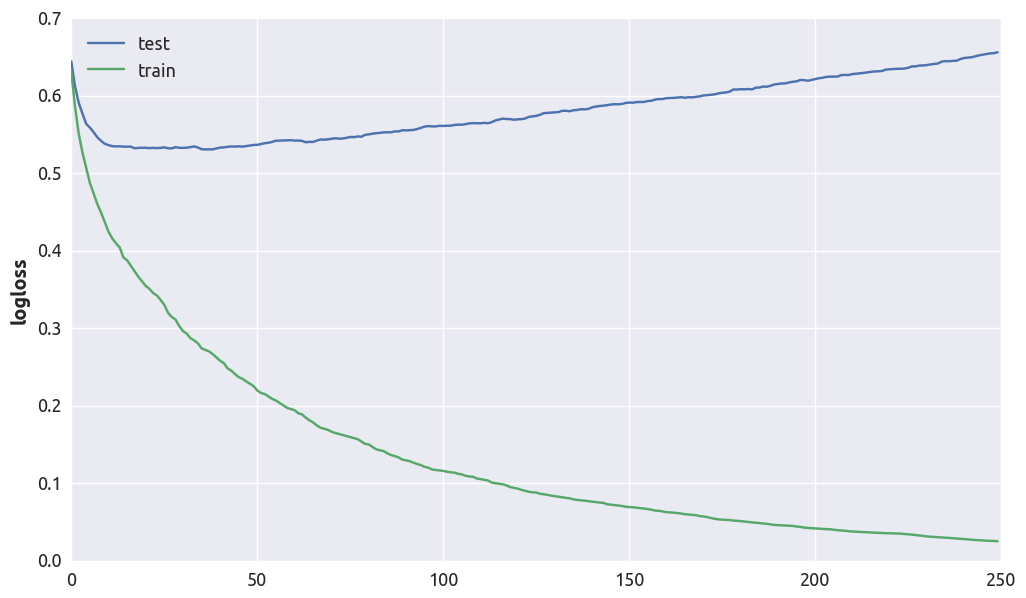

In [96]:
plt.plot(range(250), ll_staged_test, label='test')
plt.plot(range(250), ll_staged_train, label='train')
plt.legend(loc='best')
plt.ylabel('logloss');

# q 1

In [97]:
with open('t2-ans1.txt', 'w') as fp:
    fp.write('overfitting')

In [98]:
ll_staged_test = np.array(ll_staged_test)

In [102]:
min_ll, min_ll_idx = round(ll_staged_test.min(), 2), np.argmin(ll_staged_test)
min_ll, min_ll_idx

(0.53000000000000003, 36)

# q 2

In [103]:
with open('t2-ans2.txt', 'w') as fp:
    fp.write('{:.2f} {}'.format(min_ll, min_ll_idx))

# q 3

In [105]:
cls = GradientBoostingClassifier(n_estimators=min_ll_idx, verbose=True, random_state=241)
cls.fit(X_train, y_train)
predictions = cls.predict_proba(X_test)

      Iter       Train Loss   Remaining Time 
         1           1.3199            2.18s
         2           1.2645            1.90s
         3           1.2170            1.75s
         4           1.1775            1.68s
         5           1.1404            1.67s
         6           1.1106            1.58s
         7           1.0844            1.50s
         8           1.0617            1.43s
         9           1.0411            1.40s
        10           1.0223            1.33s
        20           0.8864            0.76s
        30           0.7844            0.30s


In [108]:
ll_final = round(log_loss(y_test, predictions), 2)
ll_final

0.53000000000000003

In [109]:
with open('t2-ans3.txt', 'w') as fp:
    fp.write('{:.2f}'.format(ll_final))